# readDiag - Radiance

The `readDiag` package is designed to facilitate easy access to diagnostic files generated by the [Gridpoint Statistical Interpolation (GSI) system](https://github.com/NOAA-EMC/GSI). The package primarily consists of two classes: one for reading data (`read_diag`) and another for creating various types of figures with selected data (`plot_diag`). Detailed information about the available tools in the `read_diag` and `plot_diag` classes can be found in the `readDiag_tutorial_completo-pt_br` notebook. This notebook presents the tools in `readDiag` that have been built and modified (so far) for accessing **radiance** diagnostic files generated by GSI.

## The `read_diag` Class

The `read_diag` class has not been altered. Below, the tools from this class are used as examples to visualize radiance data diagnostics.

## The `plot_diag` Class

In the `plot_diag` class, the following functions have been created or modified for reading and analyzing radiance data:

1. `plot(self, varName, varType, param, minVal=None, maxVal=None, mask=None, area=None, **kwargs)`: the `plot` function generates a figure for the variable `varName` (e.g., `amsua`), `varType` (e.g., `n19` (satellite)), and `param`, which can have several options such as: `param="obs"` for observation value, `param="omf"` for observation minus background, or `param="oma"` for observation minus analysis. The optional variables `minVal` and `maxVal` were added to set the colormap range. It's also possible to mask data with the variables `iuse` and `idqc`, indicating if the radiance data was assimilated (`iuse>=1 & idqc=0`) or rejected (`iuse>=1 & idqc!=0`), or if the data is monitored (`iuse=-1`). Using the `mask` variable, it's also possible to specify the channel `nchan` (channel number). Below is an example executed for `varName="amsua"`, `varType="n19"`, `param="obs"`, and `mask="(nchan==14) & (iuse >= 1 & idqc == 0)"`:

<img src=notefigs/amsua_n19_obs_CH14_2024020100_plot_0.png style="width: 800px;">
<br>

2. `time_series_radi(self, varName=None, varType=None, mask=None, dateIni=None, dateFin=None, nHour="06", vminOMA=None, vmaxOMA=None, vminSTD=0.0, vmaxSTD=14.0, channel=None, Clean=None)`: the `time_series_radi` function generates figures showing the temporal variation of the means and standard deviations of the OmF and OmA parameters for radiance data. This function can be used in three situations: when `channel` is a channel number (4 figures are generated using only observations from the specified channel), when `channel` is a list of channels (6 Hovmoller diagrams are created considering only the listed channels), and when `channel` is `None` (6 Hovmoller diagrams are generated considering all available channels (1 to 15)).

The input parameters for the function are as follows:
    
| Parameter       | Example                                       | Description |
| :---            | :---:                                         | :--- |
| `self`          | `['/home/user/diag_amsua_n19_01.2024020100']` | List of full paths (`path/filename`) for each time in the time series. |             
| `varName`       | `amsua`                                       | Variable name |   
| `varType`       | `n19`                                         | Variable type |
| `dateIni`       | `2024020100`                                  | Initial date of the time series |
| `dateFin`       | `2024020218`                                  | Final date of the time series |
| `nHour`         | `6`                                           | Time interval in hours between each file in the `self` list |
| `vminOMA`       | `-2.0`                                        | Minimum y-axis value for OmF and OmA |
| `vmaxOMA`       | `2.0`                                         | Maximum y-axis value for OmF and OmA |
| `vminSTD`       | `0.0`                                         | Minimum y-axis value for the standard deviation |
| `vmaxSTD`       | `14.0`                                        | Maximum y-axis value for the standard deviation |
| `channel`       | `14`                                          | Channel value(s) for the time series: a numeric value for one channel, e.g., `14` for one channel; `[6, 9, 10, 13, 14]` for a specific list of channels; `None` for all channels. |
| `Clean`         | `True` or `False`                             | If `True`, after generating and saving the figure, the figure window is reset (`plt.clf()`) or closed (`plt.close()`); if `False`, this procedure is skipped and the figure remains available for viewing with `plt.show()`. |

3. `statcount(self, varName=None, varType=None, noiqc=False, dateIni=None, dateFin=None, nHour="06", channel=None, figTS=False, figMap=False, **kwargs)`: the `statcount` function generates two types of figures. If `figTS` is `True`, a time series figure of the number of assimilated, rejected, and monitored data is generated. If `figMap` is `True`, a temporal sequence of figures indicating the geolocation of assimilated, rejected, and monitored observations on the map is produced. In this function, when the data is radiance, the `channel` variable receives the specific channel number, and for conventional data, the `channel` variable should be `None`. When `channel = channel number`, monitored data (`iuse=-1`) is subclassified into two groups: monitored observations that would be assimilated (monitored-assimilated) as `idqc=0` and monitored observations that would be rejected (monitored-rejected) as `idqc!=0`. Therefore, for radiance data, if `figMap=True`, two figures can be generated, one with the geolocation of assimilated and rejected observations and another with the geolocation of monitored-assimilated and monitored-rejected observations. The `noiqc` variable is a parameter from the GSI name list used in the classification of conventional data and can be `True` or `False` (it does not affect radiance classification). Below is an example executed for `varName="amsua"`, `varType="n19"`, `noiqc=False`, `dateIni="2024020100"`, `dateFin="2024020218"`, `nHour="06"`, `channel=6`, `figTS=True`, `figMap=True`.

`figMap=True`
<br>
| <img src=notefigs/Assim-Rejei_amsua-n19_CH6_2024020100.png style="width: 400px;"> | <img src=notefigs/Assim-Rejei_amsua-n19_CH6_2024020106.png style="width: 400px;"> |
|-|-|
|<img src=notefigs/Assim-Rejei_amsua-n19_CH6_2024020112.png style="width: 400px;"> | <img src=notefigs/Assim-Rejei_amsua-n19_CH6_2024020118.png style="width: 400px;"> |
| <img src=notefigs/Assim-Rejei_amsua-n19_CH6_2024020200.png style="width: 400px;"> | <img src=notefigs/Assim-Rejei_amsua-n19_CH6_2024020206.png style="width: 400px;"> |
|<img src=notefigs/Assim-Rejei_amsua-n19_CH6_2024020212.png style="width: 400px;"> | <img src=notefigs/Assim-Rejei_amsua-n19_CH6_2024020218.png style="width: 400px;"> |
<br>

`figTS=True`
<br>
<img src=notefigs/time_series_amsua-n19_CH6__TotalObs.png style="width: 400px;">
<br> 

Throughout this notebook, examples with code snippets are provided to illustrate the use of the functions listed above.

## Using the `read_diag` Class

### Necessary Libraries

To start using `readDiag`, first load the necessary libraries:

* `gsidiag`: the library containing the `read_diag` and `plot_diag` classes;
* `pandas`: the library providing the tabulated data structures used by `readDiag`;
* `matplotlib`: the library used to create figures;
* `datetime`: the library used for date manipulation;
* `datasources`: the library used to analyze and store information from a file containing observation data;
* `os`: the library providing various operating system interfaces.

The `%matplotlib inline` directive is a Jupyter magic command that adjusts the environment so that the `plt.show()` command is not needed every time figures are displayed within the notebook. If you are using `readDiag` within a Python script, this directive can be omitted, and the `plt.show()` command should be used, depending on the situation.

In [1]:
import gsidiag as gd

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from gsidiag.datasources import getVarInfo

import os

%matplotlib inline

### Main Variables

The following table lists the default values of the variables used throughout this tutorial. Note that the variables have different types and some can be declared as `None`.

| Variables  |     | Values          | Type              |
| :---:      |:---:| :---            | :---              |
| `DIRdiag`  | =   | `/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout` | string |
| `varName`  | =   | `amsua`          | string            |  
| `varType`  | =   | `n19`            | <span style="color:red">**string**</span> |        
| `dateIni`  | =   | `2024021000`     | string            |
| `dateFin`  | =   | `2024021018`     | string            |
| `nHour`    | =   | `6`              | string            | 
| `vminOMA`  | =   | `-2.0`           | float             |
| `vmaxOMA`  | =   | `2.0`            | float             |
| `vminSTD`  | =   | `0.0`            | float             |
| `vmaxSTD`  | =   | `14.0`           | float             |
| `channel`  | =   | `6`              | integer or `None` |

Therefore, in the following cell, the variables are set according to the values in the table above. Additionally, the date values are also set to compose the path and names of the GSI diagnostic files:

In [2]:
#Directory where data should be available for tests
# For use on Egeon
#DIRdiag = "/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# For use on Itapemirim (Colorado, Ilopolis, and other virtual machines)
#DIRdiag = "/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# For use on a local machine (in this case, the remote directory should be mounted locally using the sshfs command)
# Example: 
# $ sshfs username@egeon.cptec.inpe.br:/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout /extra2/EGEON_EXP18_GSI_dataout
# or
# $ sshfs username@itapemirim.cptec.inpe.br:/share/das/dist/joao.gerd/EXP18/GSI/dataout /extra2/EGEON_EXP18_GSI_dataout
# DIRdiag = '/extra2/EGEON_EXP18_GSI_dataout'

# For machines outside CPTEC, the data needs to be downloaded outside of Python. To do this, the following commands can be used:

# cd ~/readDiag/data
# EXP19: To execute the two days, at least 2GB of RAM is required
# wget -c -r https://ftp1.cptec.inpe.br/pesquisa/das/testecase/SMNAexp19_amsua.tar.gz
# tar -xzvf ftp1.cptec.inpe.br/pesquisa/das/testecase/SMNAexp19_amsua.tar.gz
# rm -rf ftp1.cptec.inpe.br

# Set the DIRdiag variable for your specific environment

# For use on Egeon
#DIRdiag = "/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# Uncomment and set DIRdiag for other environments as needed

# For use on Itapemirim
# DIRdiag = "/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# For use on a local machine (ensure the remote directory is mounted locally)
# DIRdiag = '/extra2/EGEON_EXP18_GSI_dataout'

!wget -P ../data -c -r https://dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19_amsua.tar.gz
!wget -P ../data -c -r https://dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19_conv_0201.tar.gz
!wget -P ../data -c -r https://dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19_conv_0202.tar.gz

!tar -zxvf ../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19_amsua.tar.gz -C ../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/
!tar -zxvf ../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19_conv_0201.tar.gz -C ../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/
!tar -zxvf ../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19_conv_0202.tar.gz -C ../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/

# To obtain the ${USER} from the operating system, the os.environ.get('USER') function from the os library is used.
DIRdiag = os.path.join(os.getcwd(), '../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19/GSI/dataout')

varName = 'amsua'
varType = 'n19'
dateIni = '2024020100' 
dateFin = '2024020218'
nHour = '6'          
vminOMA = -2.0       
vmaxOMA = 2.0        
vminSTD = 0.0        
vmaxSTD = 14.0       
channel = 6

datei = datetime.strptime(str(dateIni), '%Y%m%d%H')
datef = datetime.strptime(str(dateFin), '%Y%m%d%H')
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq='6H').tolist()]

print(dates)

--2024-08-20 15:17:14--  https://dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19_amsua.tar.gz
Resolving dataserver.cptec.inpe.br (dataserver.cptec.inpe.br)... 150.163.141.26
Connecting to dataserver.cptec.inpe.br (dataserver.cptec.inpe.br)|150.163.141.26|:443... connected.
HTTP request sent, awaiting response... 416 REQUESTED RANGE NOT SATISFIABLE

    The file is already fully retrieved; nothing to do.

--2024-08-20 15:17:16--  https://dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19_conv_0201.tar.gz
Resolving dataserver.cptec.inpe.br (dataserver.cptec.inpe.br)... 150.163.141.26
Connecting to dataserver.cptec.inpe.br (dataserver.cptec.inpe.br)|150.163.141.26|:443... connected.
HTTP request sent, awaiting response... 416 REQUESTED RANGE NOT SATISFIABLE

    The file is already fully retrieved; nothing to do.

--2024-08-20 15:17:18--  https://dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19_conv_0202.tar.gz
Resolving dataserver.cptec.i

Generating the `path` and `pathc` variables, which will contain the full paths (including file names) of the diagnostic files for the first (OmF) and last (OmA) outer loops of the **radiance** data:

In [3]:
# Adapted to create paths for radiance files!
paths, pathsc = [], []

OuterL = '01'        
[paths.append(DIRdiag + '/' + dt + '/diag_' + varName +'_'+ varType +'_' + OuterL + '.' + dt) for dt in dates]
    
OuterLc = '03'
[pathsc.append(DIRdiag + '/' + dt + '/diag_' + varName +'_'+ varType +'_' + OuterLc + '.' + dt) for dt in dates]

print(paths)
print('')
print(pathsc)

['/extra3/GitHub/readDiag.tagV1.3.0/notebooks/../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19/GSI/dataout/2024020100/diag_amsua_n19_01.2024020100', '/extra3/GitHub/readDiag.tagV1.3.0/notebooks/../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19/GSI/dataout/2024020106/diag_amsua_n19_01.2024020106', '/extra3/GitHub/readDiag.tagV1.3.0/notebooks/../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19/GSI/dataout/2024020112/diag_amsua_n19_01.2024020112', '/extra3/GitHub/readDiag.tagV1.3.0/notebooks/../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19/GSI/dataout/2024020118/diag_amsua_n19_01.2024020118', '/extra3/GitHub/readDiag.tagV1.3.0/notebooks/../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19/GSI/dataout/2024020200/diag_amsua_n19_01.2024020200', '/extra3/GitHub/readDiag.tagV1.3.0/notebooks/../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19/GSI/dataout/202

### Reading Diagnostic Files

Reading the diagnostic files of **radiance** using the `read_diag()` function from the `readDiag` package. In the following code snippet, note that the `read_diag()` function is used within a loop that iterates over all the files in the `paths` and `pathsc` lists defined in the previous step. At the end of the loop, the `gdf_list` is generated, which will contain all the files read by `readDiag`:

In [4]:
read = True

if read:        
    gdf_list = []
    print('')
    
    print('Please wait, the estimated total time for reading the files is ' +
          str(int((float(len(paths))*20)/60)) + ' minutes and ' +
          str(int((float(len(paths))*20)%60)) + ' seconds.')
    
    print('')
    
    for path, pathc in zip(paths, pathsc):
        print('Reading ' + path)
        
        gdf = gd.read_diag(path, pathc)
        
        gdf_list.append(gdf)
        
    print('Done!')    


Please wait, the estimated total time for reading the files is 2 minutes and 40 seconds.

Reading /extra3/GitHub/readDiag.tagV1.3.0/notebooks/../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19/GSI/dataout/2024020100/diag_amsua_n19_01.2024020100
 
>>> GSI DIAG <<<
 
Reading /extra3/GitHub/readDiag.tagV1.3.0/notebooks/../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19/GSI/dataout/2024020106/diag_amsua_n19_01.2024020106
 
>>> GSI DIAG <<<
 
Reading /extra3/GitHub/readDiag.tagV1.3.0/notebooks/../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19/GSI/dataout/2024020112/diag_amsua_n19_01.2024020112
 
>>> GSI DIAG <<<
 
Reading /extra3/GitHub/readDiag.tagV1.3.0/notebooks/../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19/GSI/dataout/2024020118/diag_amsua_n19_01.2024020118
 
>>> GSI DIAG <<<
 
Reading /extra3/GitHub/readDiag.tagV1.3.0/notebooks/../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testeca

The `gdf_list` variable is a list of dataframes containing the data from each diagnostic file. To work with a single time, simply specify the list with a fixed index, for example: `gdf_list[0]`:

In [5]:
gdf_list

By setting `tidx = 0`, we obtain the first object from the `gdf_list`:

In [6]:
tidx = 0
gdf_list[tidx]

### Obtaining Information from Files

Use the `pfileinfo()` function to obtain information such as the sensor type and its respective satellite (`n19`) contained within the file:

In [7]:
gdf_list[tidx].pfileinfo()

Variable Name : amsua
              └── kx => n19  



In addition to the `pfileinfo()` method, other methods and functions can also be used to access information about the open files. To get a list of available methods and functions, type `gdf_list[tidx].` and press the `<TAB>` key twice:

```python
>>> gdf_list[tidx].
gdf_list[tidx].close(      gdf_list[tidx].obsInfo     gdf_list[tidx].pfileinfo(  gdf_list[tidx].zlevs       
gdf_list[tidx].tocsv(      gdf_list[tidx].overview(   gdf_list[tidx].varNames    
gdf_list[tidx].obs
```

The built-in methods and functions have documentation that can be accessed as follows:

```python
print(object.function_name.__doc__)
```

or

```python
help(object.function_name)
```

For example:

In [8]:
print(gdf_list[tidx].pfileinfo.__doc__)


        Prints a fancy list of the existing variables and types.

        Usage: pfileinfo()
        


or even:

In [9]:
help(gdf_list[tidx].pfileinfo)

Help on method pfileinfo in module gsidiag.__main__:

pfileinfo() method of gsidiag.__main__.read_diag instance
    Prints a fancy list of the existing variables and types.
    
    Usage: pfileinfo()



To obtain a dictionary with all the information about the variables and types contained in the file, use the `obsInfo` method:

In [10]:
gdf_list[tidx].obsInfo

{'amsua':                     lat         lon         elev  nchan      time  iuse  idqc  \
 SatId points                                                                    
 n19   0      -87.446198    6.644900  2647.032227    1.0  2.885000   1.0   8.0   
       1      -87.446198    6.644900  2647.032227    2.0  2.885000   1.0   8.0   
       2      -87.446198    6.644900  2647.032227    3.0  2.885000   1.0   8.0   
       3      -87.446198    6.644900  2647.032227    4.0  2.885000   1.0   8.0   
       4      -87.446198    6.644900  2647.032227    5.0  2.885000   1.0   8.0   
 ...                 ...         ...          ...    ...       ...   ...   ...   
       137830  56.754601  336.250885     0.055578   11.0 -1.522778   1.0   0.0   
       137831  56.754601  336.250885     0.055578   12.0 -1.522778   1.0   0.0   
       137832  56.754601  336.250885     0.055578   13.0 -1.522778   1.0   0.0   
       137833  56.754601  336.250885     0.055578   14.0 -1.522778   4.0   0.0   
       

To access a specific variable (e.g., `amsua`), do the following:

In [11]:
print('Variável: ', varName)

gdf_list[tidx].obsInfo[varName]

Variável:  amsua


lat         lon         elev  nchan      time  iuse  idqc  \
SatId points                                                                    
n19   0      -87.446198    6.644900  2647.032227    1.0  2.885000   1.0   8.0   
      1      -87.446198    6.644900  2647.032227    2.0  2.885000   1.0   8.0   
      2      -87.446198    6.644900  2647.032227    3.0  2.885000   1.0   8.0   
      3      -87.446198    6.644900  2647.032227    4.0  2.885000   1.0   8.0   
      4      -87.446198    6.644900  2647.032227    5.0  2.885000   1.0   8.0   
...                 ...         ...          ...    ...       ...   ...   ...   
      137830  56.754601  336.250885     0.055578   11.0 -1.522778   1.0   0.0   
      137831  56.754601  336.250885     0.055578   12.0 -1.522778   1.0   0.0   
      137832  56.754601  336.250885     0.055578   13.0 -1.522778   1.0   0.0   
      137833  56.754601  336.250885     0.055578   14.0 -1.522778   4.0   0.0   
      137834  56.754601  336.250885     0.055578   15.0 -1.522778   1.0  51.0   

                inverr       oer         obs        omf   omf_nobc     emiss  \
SatId points                                                                   
n19   0       0.000000       NaN  187.330002   2.591137  -7.817700  0.813564   
      1       0.000000       NaN  189.190002   4.114823  -3.598879  0.801515   
      2       0.000000       NaN  211.460007  -1.666820   2.795111  0.791668   
      3       0.000000       NaN  225.820007   0.495127  -0.318058  0.791438   
      4       0.000000       NaN  229.089996   0.241357  -1.846274  0.790830   
...                ...       ...         ...        ...        ...       ...   
      137830  2.499857  0.400023  219.949997   0.632804  -0.609745  0.856901   
      137831  1.817697  0.550150  219.039993   0.488474  -0.474023  0.856901   
      137832  1.248405  0.801043  217.449997  -1.116789  -1.843264  0.856901   
      137833  0.248456  4.025372  219.979996  -0.762485  -0.762485  0.856901   
      137834  0.000000       NaN  229.039993 -23.291994 -41.154434  0.950000   

                    oma   oma_nobc       imp       dfs  \
SatId points                                             
n19   0        2.803686  -7.640147       NaN       NaN   
      1        4.388880  -3.414203       NaN       NaN   
      2       -1.364057   3.049402       NaN       NaN   
      3        0.594996  -0.230114       NaN       NaN   
      4        0.297319  -1.806047       NaN       NaN   
...                 ...        ...       ...       ...   
      137830   0.451392  -0.792813 -0.491687 -0.286979   
      137831   0.409210  -0.554484 -0.129336 -0.070378   
      137832  -0.789088  -1.543222 -0.779681 -0.456870   
      137833   0.452604   0.452604 -0.093540 -0.230162   
      137834 -23.673958 -41.430882       NaN       NaN   

                                geometry  
SatId points                              
n19   0        POINT (6.64490 -87.44620)  
      1        POINT (6.64490 -87.44620)  
      2        POINT (6.64490 -87.44620)  
      3        POINT (6.64490 -87.44620)  
      4        POINT (6.64490 -87.44620)  
...                                  ...  
      137830  POINT (-23.74915 56.75460)  
      137831  POINT (-23.74915 56.75460)  
      137832  POINT (-23.74915 56.75460)  
      137833  POINT (-23.74915 56.75460)  
      137834  POINT (-23.74915 56.75460)  

[137835 rows x 18 columns]

To access specific variables and types (e.g., `amsua` of type `n19`), do the following:

In [12]:
print('Variável: ', varName, ' e Tipo: ', varType)

gdf_list[tidx].obsInfo[varName].loc[varType]

Variável:  amsua  e Tipo:  n19


lat         lon         elev  nchan      time  iuse  idqc  \
points                                                                    
0      -87.446198    6.644900  2647.032227    1.0  2.885000   1.0   8.0   
1      -87.446198    6.644900  2647.032227    2.0  2.885000   1.0   8.0   
2      -87.446198    6.644900  2647.032227    3.0  2.885000   1.0   8.0   
3      -87.446198    6.644900  2647.032227    4.0  2.885000   1.0   8.0   
4      -87.446198    6.644900  2647.032227    5.0  2.885000   1.0   8.0   
...           ...         ...          ...    ...       ...   ...   ...   
137830  56.754601  336.250885     0.055578   11.0 -1.522778   1.0   0.0   
137831  56.754601  336.250885     0.055578   12.0 -1.522778   1.0   0.0   
137832  56.754601  336.250885     0.055578   13.0 -1.522778   1.0   0.0   
137833  56.754601  336.250885     0.055578   14.0 -1.522778   4.0   0.0   
137834  56.754601  336.250885     0.055578   15.0 -1.522778   1.0  51.0   

          inverr       oer         obs        omf   omf_nobc     emiss  \
points                                                                   
0       0.000000       NaN  187.330002   2.591137  -7.817700  0.813564   
1       0.000000       NaN  189.190002   4.114823  -3.598879  0.801515   
2       0.000000       NaN  211.460007  -1.666820   2.795111  0.791668   
3       0.000000       NaN  225.820007   0.495127  -0.318058  0.791438   
4       0.000000       NaN  229.089996   0.241357  -1.846274  0.790830   
...          ...       ...         ...        ...        ...       ...   
137830  2.499857  0.400023  219.949997   0.632804  -0.609745  0.856901   
137831  1.817697  0.550150  219.039993   0.488474  -0.474023  0.856901   
137832  1.248405  0.801043  217.449997  -1.116789  -1.843264  0.856901   
137833  0.248456  4.025372  219.979996  -0.762485  -0.762485  0.856901   
137834  0.000000       NaN  229.039993 -23.291994 -41.154434  0.950000   

              oma   oma_nobc       imp       dfs                    geometry  
points                                                                        
0        2.803686  -7.640147       NaN       NaN   POINT (6.64490 -87.44620)  
1        4.388880  -3.414203       NaN       NaN   POINT (6.64490 -87.44620)  
2       -1.364057   3.049402       NaN       NaN   POINT (6.64490 -87.44620)  
3        0.594996  -0.230114       NaN       NaN   POINT (6.64490 -87.44620)  
4        0.297319  -1.806047       NaN       NaN   POINT (6.64490 -87.44620)  
...           ...        ...       ...       ...                         ...  
137830   0.451392  -0.792813 -0.491687 -0.286979  POINT (-23.74915 56.75460)  
137831   0.409210  -0.554484 -0.129336 -0.070378  POINT (-23.74915 56.75460)  
137832  -0.789088  -1.543222 -0.779681 -0.456870  POINT (-23.74915 56.75460)  
137833   0.452604   0.452604 -0.093540 -0.230162  POINT (-23.74915 56.75460)  
137834 -23.673958 -41.430882       NaN       NaN  POINT (-23.74915 56.75460)  

[137835 rows x 18 columns]

To access the observation value, use the `obs` method:

In [13]:
print('Variável: ', varName, ' e Tipo: ', varType)

gdf_list[tidx].obsInfo[varName].loc[varType].obs

Variável:  amsua  e Tipo:  n19


points
0         187.330002
1         189.190002
2         211.460007
3         225.820007
4         229.089996
             ...    
137830    219.949997
137831    219.039993
137832    217.449997
137833    219.979996
137834    229.039993
Name: obs, Length: 137835, dtype: float32

To access the quality control value of the observation for a specific channel, use the `idqc` method with the `mask` instruction in the `query` function:

In [14]:
mask = 'nchan == 2'
gdf_list[tidx].obsInfo[varName].query(mask).loc[varType].idqc

points
1          8.0
16         8.0
31        51.0
46        51.0
61        51.0
          ... 
137761    51.0
137776    51.0
137791    51.0
137806    51.0
137821    51.0
Name: idqc, Length: 9189, dtype: float32

## Using the `plot_diag` Class

### Spatial Distribution

The use of the functions from the `plot_diag` class, which have been modified/constructed for radiance data diagnostics, is presented below, along with the commands to generate various types of figures.

Generating a figure with the observation values (`param='obs'`) for the selected variable and type:

/extra3/GitHub/readDiag.tagV1.3.0/gsidiag/__main__.py:93: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


<Axes: xlabel='Longitude', ylabel='Latitude'>

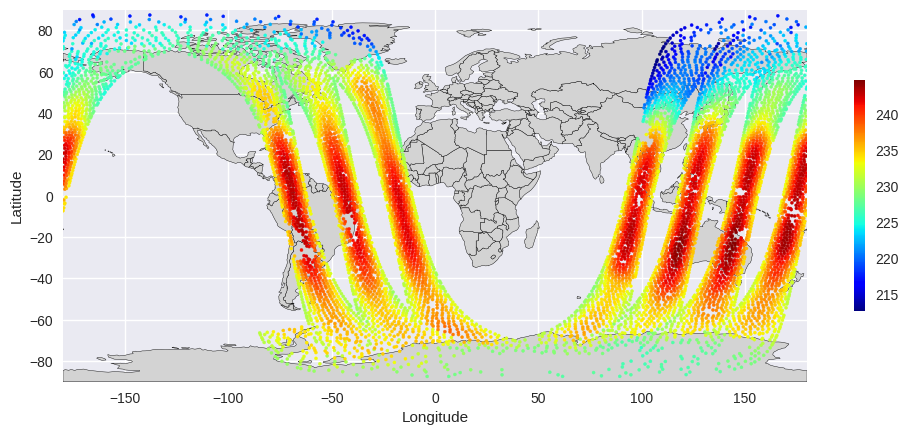

In [15]:
param = 'obs'

gd.plot_diag.plot(gdf_list[tidx], 
                  varName=varName, 
                  varType=varType, 
                  param=param,  
                  mask="(nchan=="+str(channel)+") & (iuse >= 1 & idqc == 0)", 
                  markersize=4.80, 
                  legend='true')

Below is an example of changing the colormap scale (`minVal` and `maxVal`), including information about the channel, date, sensor, and satellite (using the `getVarInfo` function from the `datasources` library), and saving the figure with the proposed name in `figname`:

/extra3/GitHub/readDiag.tagV1.3.0/gsidiag/__main__.py:93: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


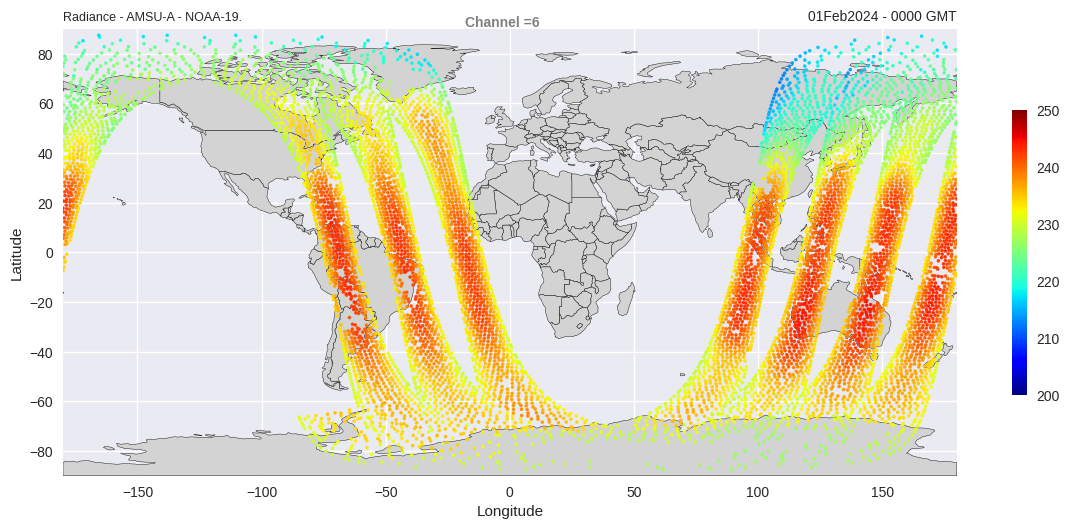

In [16]:
param = 'obs'
minVal = 200.0
maxVal = 250.0

forplot = 'Channel ='+str(channel)
varInfo = getVarInfo(varType, varName, 'instrument')
if varInfo is not None:
    instrument_title = varInfo
else:
    instrument_title = str(varName) + '-' + str(varType) + '  |  ' + 'Unknown instrument'

ax = gd.plot_diag.plot(gdf_list[tidx], 
                  varName=varName, 
                  varType=varType, 
                  param=param, 
                  minVal=minVal, 
                  maxVal=maxVal, 
                  mask="(nchan=="+str(channel)+") & (iuse >= 1 & idqc == 0)", 
                  markersize=4.80, 
                  legend='true')

if ax != None:
    datefmt = dates[tidx]
    date = datetime.strptime(str(datefmt), "%Y%m%d%H")
    date_title = str(date.strftime("%d%b%Y - %H%M")) + ' GMT'
    plt.title(date_title, loc='right', fontsize=10)
    plt.title(instrument_title, loc='left', fontsize=9)
    plt.annotate(forplot, xy=(0.45, 1.015), xytext=(0, 0), xycoords='axes fraction', textcoords='offset points', 
                color='gray', fontweight='bold', fontsize='10',horizontalalignment='left', verticalalignment='center')
    
    figname=varName+"_"+str(varType)+"_"+param+"_"+"CH"+str(channel)+"_"+dates[tidx]+"_"+"plot.png"
    plt.tight_layout()
    plt.savefig(figname)

### Histogram

The `pcount()` and `vcount()` functions from the `plot_diag` class can also be used to obtain a histogram with the count of observations for the variable. However, in the case of **radiance**, since there is only data for one variable (sensor) and one type (satellite) in the files, both functions generate the same histogram with a single column:

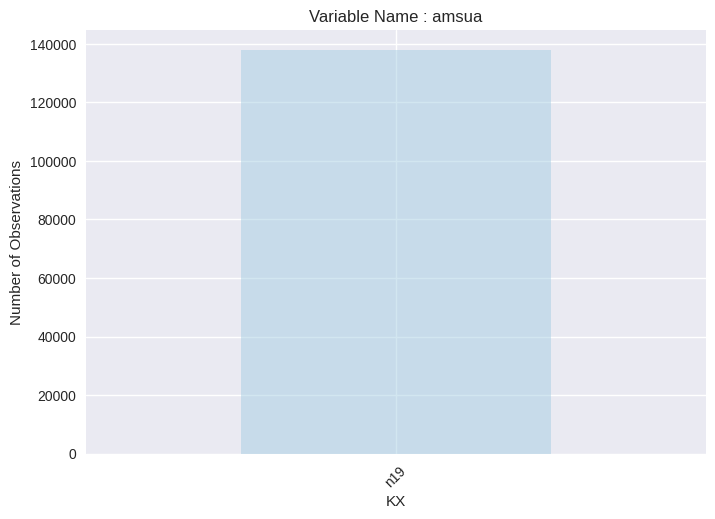

In [17]:
gd.plot_diag.pcount(gdf_list[tidx], varName)

Use the `vcount()` function from the `plot_diag` class to obtain a histogram with the count of observations for all variable types:

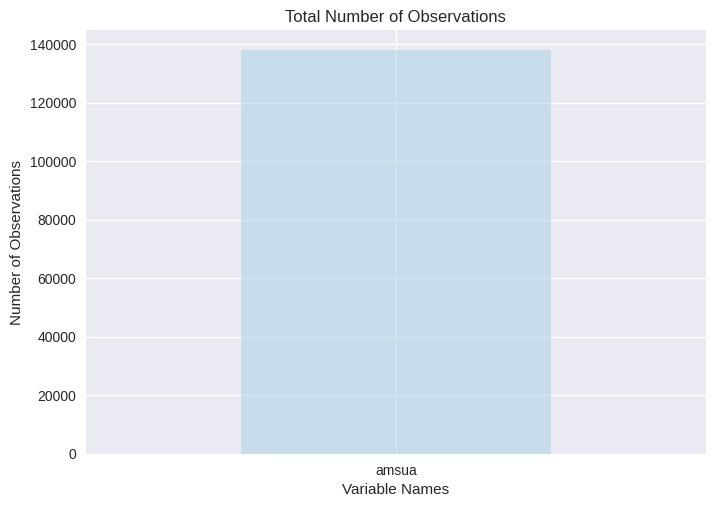

In [18]:
gd.plot_diag.vcount(gdf_list[tidx])

### Time Series

<a id='time_series'></a>
Below are the options for figures using the `time_series_radi()` function (a new function) included in the `plot_diag` class. Initially, a figure is generated with the parameters already set in this section. Following that, figures are presented by altering the `channel` parameter.

Plotting a time series of OmA and OmF:


 Variable: amsua  ||  type: n19  ||  Radiance - AMSU-A - NOAA-19.  ||  check: OmF

 Preparing data for: 2024-02-01:00  - Channel de radiancia:  6
 Preparing data for: 2024-02-01:06  - Channel de radiancia:  6
 Preparing data for: 2024-02-01:12  - Channel de radiancia:  6
 Preparing data for: 2024-02-01:18  - Channel de radiancia:  6
 Preparing data for: 2024-02-02:00  - Channel de radiancia:  6
 Preparing data for: 2024-02-02:06  - Channel de radiancia:  6
 Preparing data for: 2024-02-02:12  - Channel de radiancia:  6
 Preparing data for: 2024-02-02:18  - Channel de radiancia:  6


channels =  [6]
 Calculating for 2024-02-01:00
 Calculating for 2024-02-01:06
 Calculating for 2024-02-01:12
 Calculating for 2024-02-01:18
 Calculating for 2024-02-02:00
 Calculating for 2024-02-02:06
 Calculating for 2024-02-02:12
 Calculating for 2024-02-02:18


 Making Graphics...
 Done!



<Figure size 600x400 with 0 Axes>

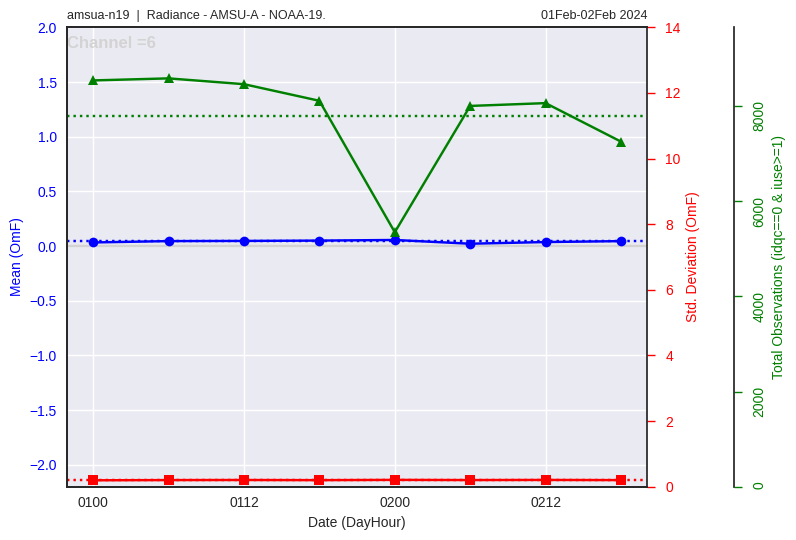

<Figure size 600x400 with 0 Axes>

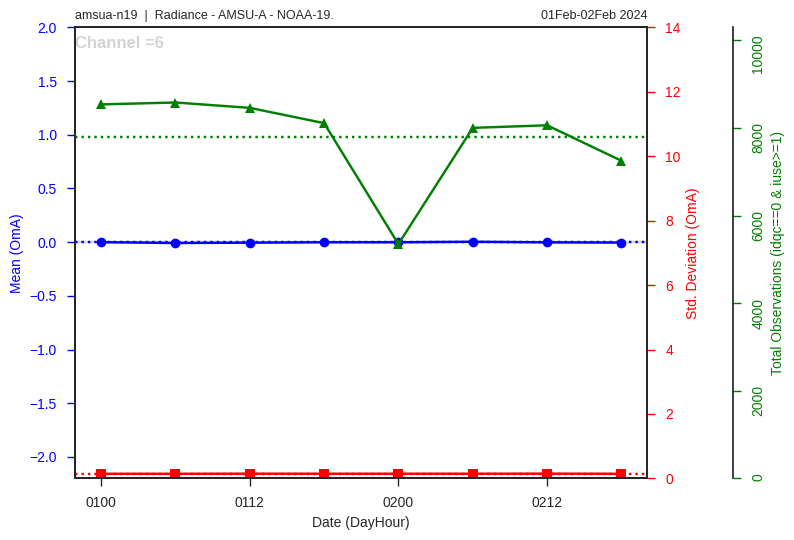

<Figure size 600x400 with 0 Axes>

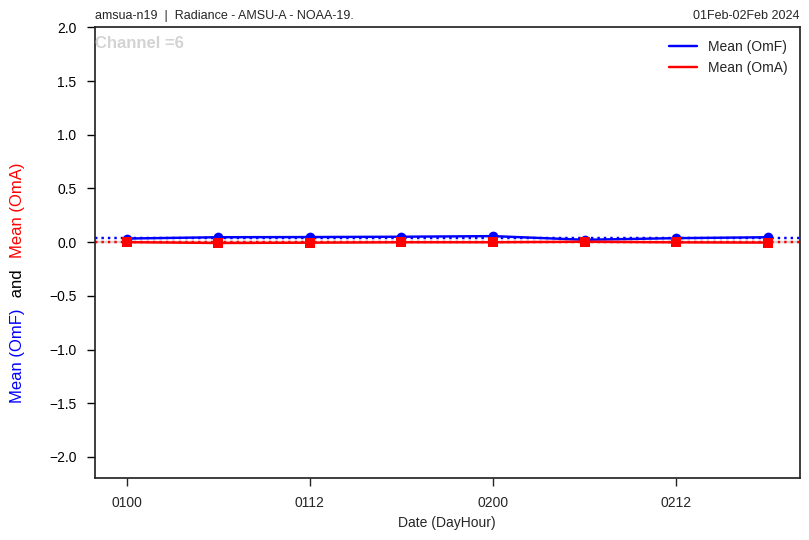

<Figure size 600x400 with 0 Axes>

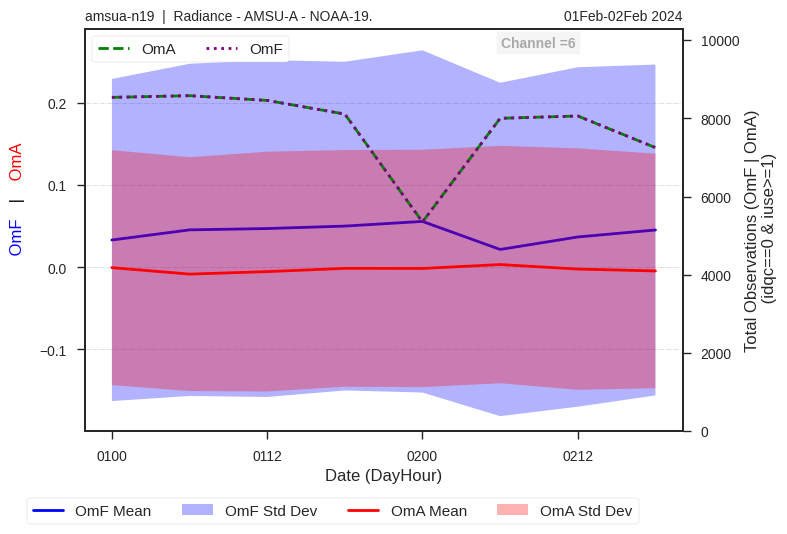

In [19]:
gd.plot_diag.time_series_radi(gdf_list,
                             varName=varName, 
                             varType=varType, 
                             mask='idqc==0 & iuse>=1', 
                             dateIni=dateIni, 
                             dateFin=dateFin, 
                             nHour=nHour, 
                             vminOMA=vminOMA, 
                             vmaxOMA=vmaxOMA, 
                             vminSTD=vminSTD, 
                             vmaxSTD=vmaxSTD, 
                             channel=channel, 
                             Clean=False)

In the previous case, the `channel` parameter was fixed at channel 6. The values for `vminOMA`, `vmaxOMA`, `vminSTD`, and `vmaxSTD`, which were initially set, are adjusted to improve the visualization of the time series.


 Variable: amsua  ||  type: n19  ||  Radiance - AMSU-A - NOAA-19.  ||  check: OmF

 Preparing data for: 2024-02-01:00  - Channel de radiancia:  6
 Preparing data for: 2024-02-01:06  - Channel de radiancia:  6
 Preparing data for: 2024-02-01:12  - Channel de radiancia:  6
 Preparing data for: 2024-02-01:18  - Channel de radiancia:  6
 Preparing data for: 2024-02-02:00  - Channel de radiancia:  6
 Preparing data for: 2024-02-02:06  - Channel de radiancia:  6
 Preparing data for: 2024-02-02:12  - Channel de radiancia:  6
 Preparing data for: 2024-02-02:18  - Channel de radiancia:  6


channels =  [6]
 Calculating for 2024-02-01:00
 Calculating for 2024-02-01:06
 Calculating for 2024-02-01:12
 Calculating for 2024-02-01:18
 Calculating for 2024-02-02:00
 Calculating for 2024-02-02:06
 Calculating for 2024-02-02:12
 Calculating for 2024-02-02:18


 Making Graphics...
 Done!



<Figure size 600x400 with 0 Axes>

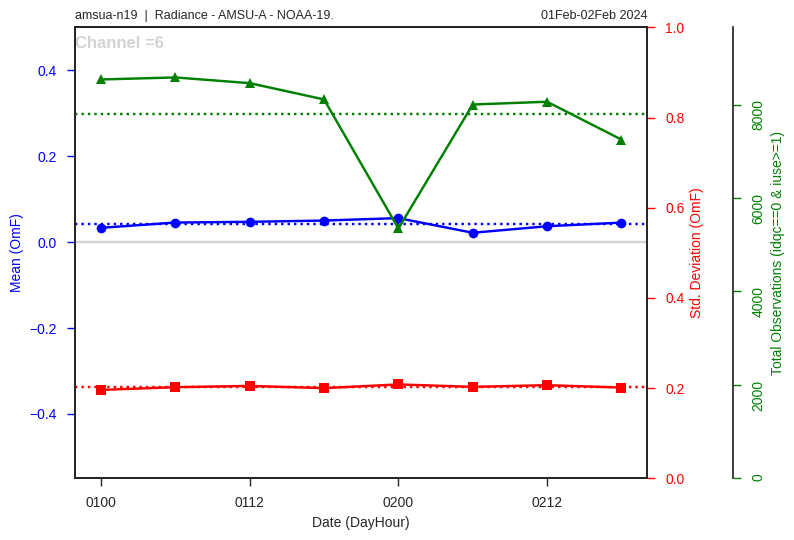

<Figure size 600x400 with 0 Axes>

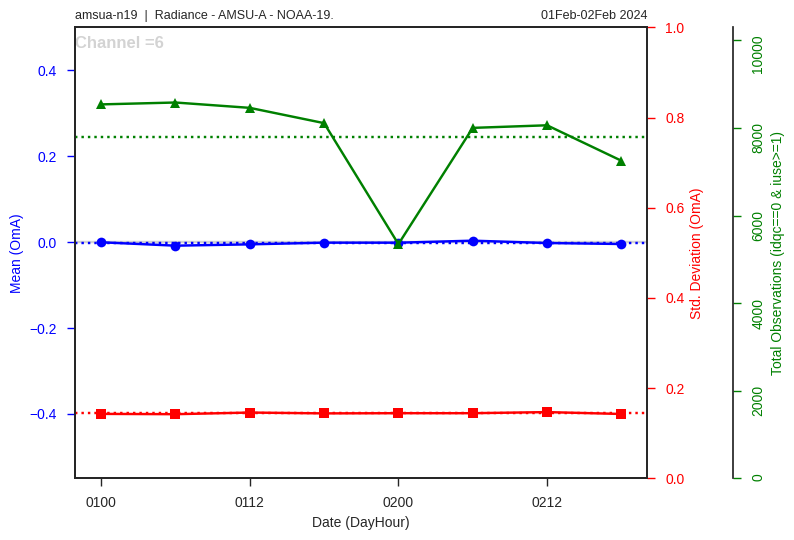

<Figure size 600x400 with 0 Axes>

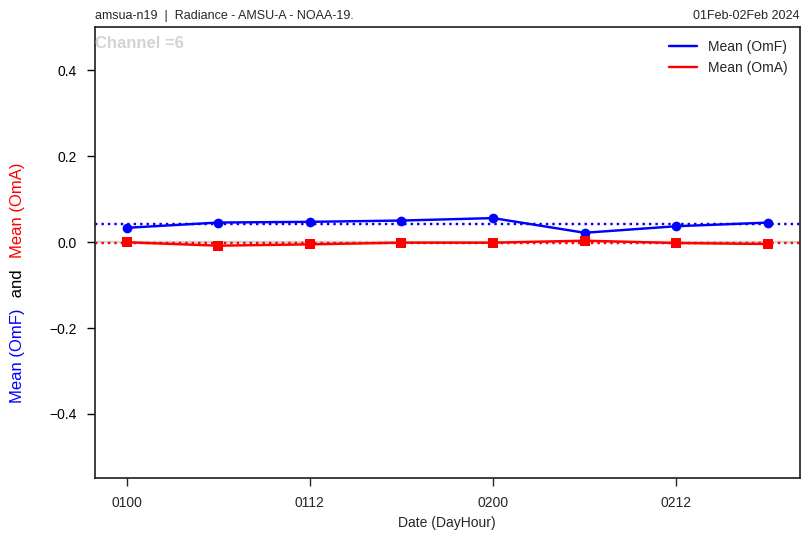

<Figure size 600x400 with 0 Axes>

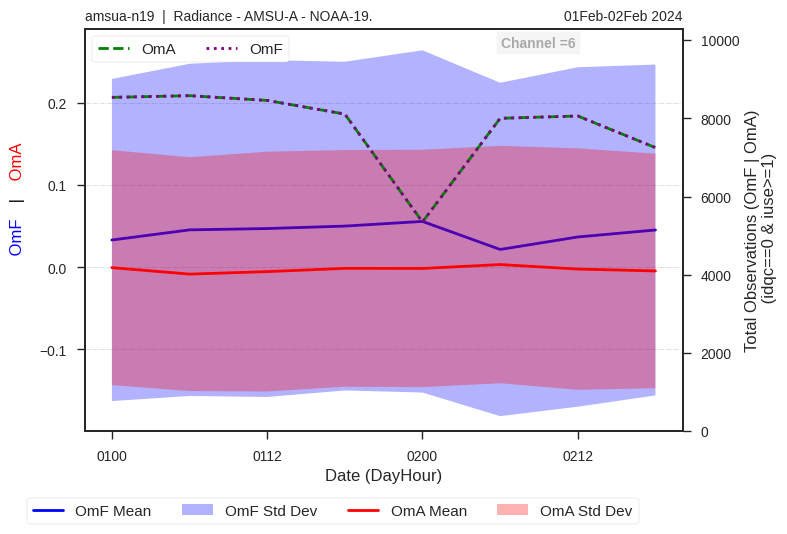

In [20]:
vminOMA = -0.5 
vmaxOMA = 0.5 
vminSTD = 0.0
vmaxSTD = 1.0

gd.plot_diag.time_series_radi(gdf_list,
                             varName=varName, 
                             varType=varType, 
                             mask='idqc==0 & iuse>=1', 
                             dateIni=dateIni, 
                             dateFin=dateFin, 
                             nHour=nHour, 
                             vminOMA=vminOMA, 
                             vmaxOMA=vmaxOMA, 
                             vminSTD=vminSTD, 
                             vmaxSTD=vmaxSTD, 
                             channel=channel, 
                             Clean=False)

Now, the `channel` variable is changed to consider more than one channel. The option `channel = None` retrieves data from every channel in the files and creates a Hovmoller diagram with the means, standard deviations, and number of assimilated data for all channels (note that the y-axis values identify all channels from 1 to 15). When `channel` is a specific list of channels provided by the user, the Hovmoller diagram is constructed only for the channels specified by the user.

In this way, you can use the `channels=[6,10,11,12,13,14]` parameter to produce a time series for multiple channels:


 Variable: amsua  ||  type: n19  ||  Radiance - AMSU-A - NOAA-19.  ||  check: OmF

 Preparing data for: Canais de radiancia2024-02-01:00
 Channels:  [6, 10, 11, 12, 13, 14]

 Preparing data for: Canais de radiancia2024-02-01:06
 Channels:  [6, 10, 11, 12, 13, 14]

 Preparing data for: Canais de radiancia2024-02-01:12
 Channels:  [6, 10, 11, 12, 13, 14]

 Preparing data for: Canais de radiancia2024-02-01:18
 Channels:  [6, 10, 11, 12, 13, 14]

 Preparing data for: Canais de radiancia2024-02-02:00
 Channels:  [6, 10, 11, 12, 13, 14]

 Preparing data for: Canais de radiancia2024-02-02:06
 Channels:  [6, 10, 11, 12, 13, 14]

 Preparing data for: Canais de radiancia2024-02-02:12
 Channels:  [6, 10, 11, 12, 13, 14]

 Preparing data for: Canais de radiancia2024-02-02:18
 Channels:  [6, 10, 11, 12, 13, 14]



channels =  [6, 10, 11, 12, 13, 14]
 Calculating for 2024-02-01:00
 Calculating for 2024-02-01:06
 Calculating for 2024-02-01:12
 Calculating for 2024-02-01:18
 Calculating for 2024-02-0

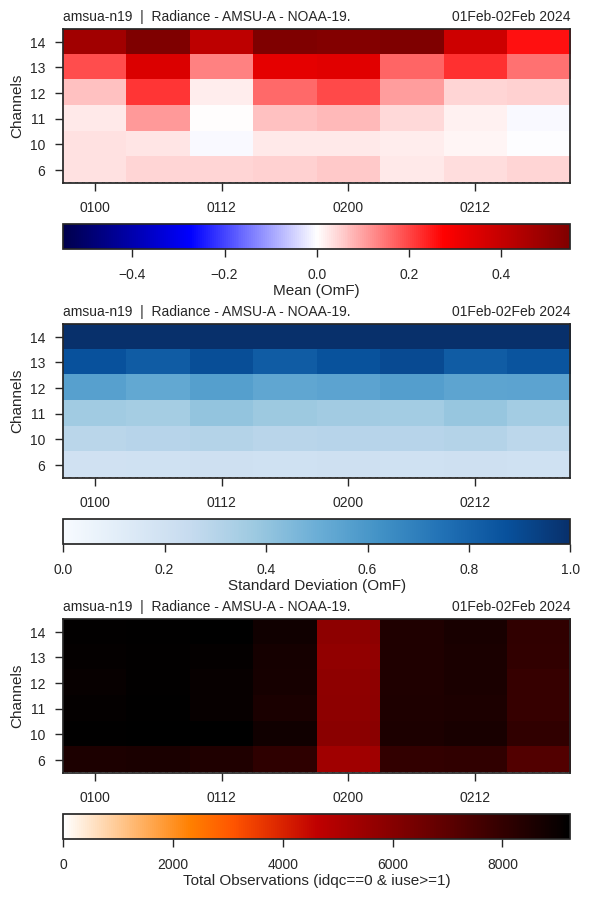

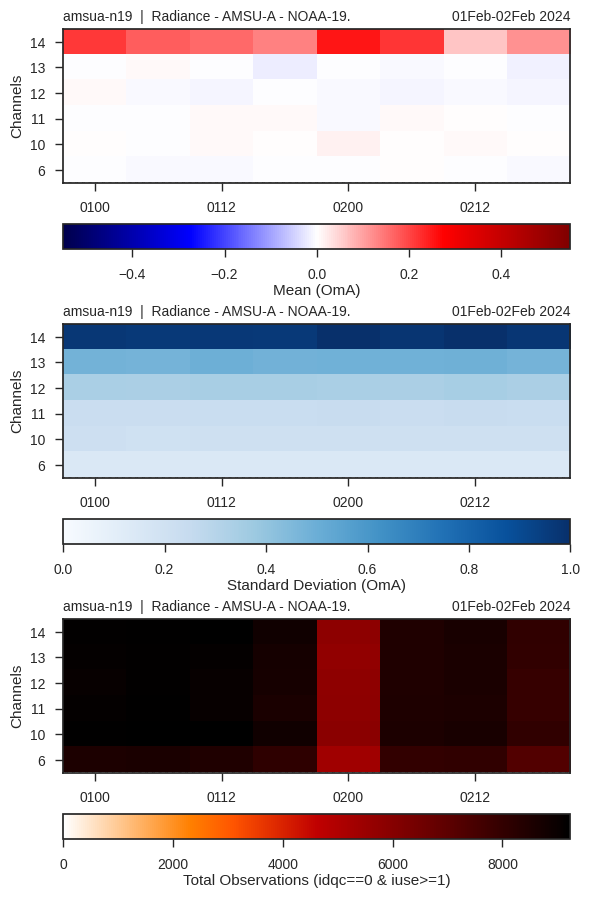

In [21]:
channels = [6, 10, 11, 12, 13, 14]

gd.plot_diag.time_series_radi(gdf_list,
                             varName=varName, 
                             varType=varType, 
                             mask='idqc==0 & iuse>=1', 
                             dateIni=dateIni, 
                             dateFin=dateFin, 
                             nHour=nHour, 
                             vminOMA=vminOMA, 
                             vmaxOMA=vmaxOMA, 
                             vminSTD=vminSTD, 
                             vmaxSTD=vmaxSTD, 
                             channel=channels, 
                             Clean=False)

Considering all channels, i.e., `channel = None`:


 Variable: amsua  ||  type: n19  ||  Radiance - AMSU-A - NOAA-19.  ||  check: OmF

 Preparing data for: Canais de radiancia2024-02-01:00
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-01:06
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-01:12
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-01:18
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-02:00
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-02:06
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-02:12
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-02:18
 Channels:  [1, 2, 3, 4, 5, 6

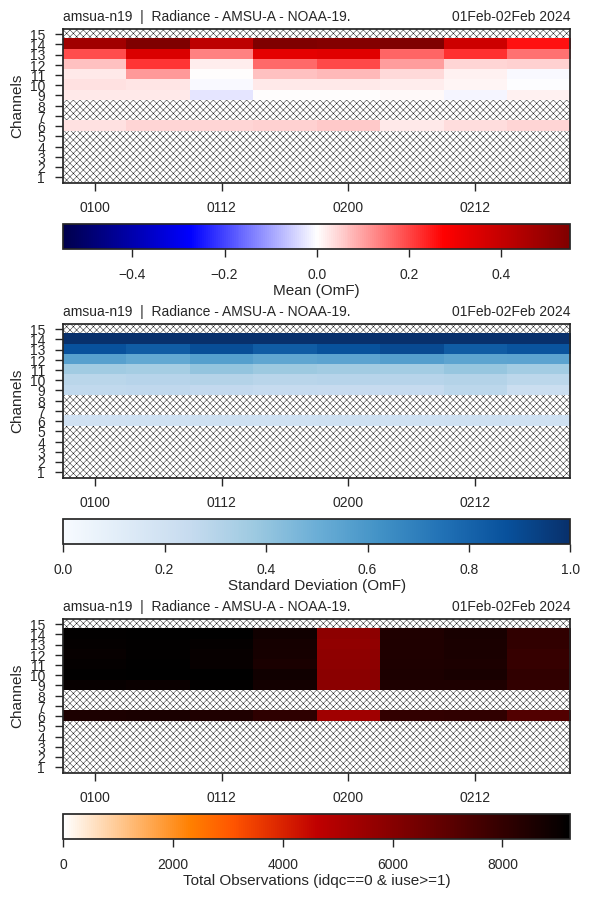

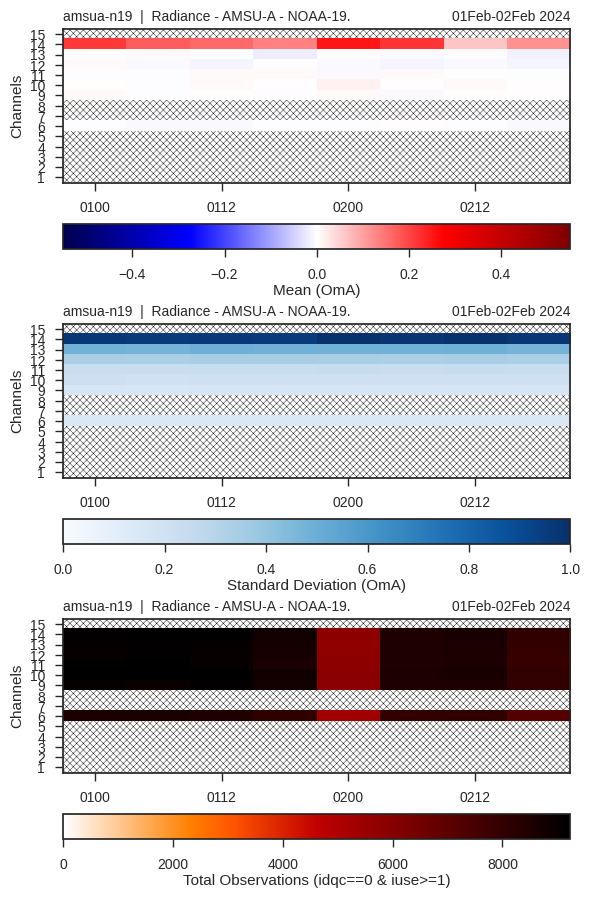

In [22]:
channel = None

gd.plot_diag.time_series_radi(gdf_list,
                             varName=varName, 
                             varType=varType, 
                             mask='idqc==0 & iuse>=1', 
                             dateIni=dateIni, 
                             dateFin=dateFin, 
                             nHour=nHour, 
                             vminOMA=vminOMA, 
                             vmaxOMA=vmaxOMA, 
                             vminSTD=vminSTD, 
                             vmaxSTD=vmaxSTD, 
                             channel=channel, 
                             Clean=False)

### STATCOUNT

Below are the options for figures obtained using the `statcount()` function. The `statcount()` function provides two types of figures: with `figMap=True`, it generates a sequence of images showing the geographical locations of assimilated, rejected, and monitored observations over a time period from `dateIni` to `dateFin` with an interval of `nHour`. Another figure, showing a time series of the number of assimilated, rejected, and monitored data, is produced if `figTS=True`. When the files used are radiance data, the `channel` variable should be set to the desired channel number (`channel=6`), while for conventional data, the `channel` variable should be set to `None` (`channel=None`).

In radiance data, the classification of data as assimilated, rejected, and monitored is done considering two types of monitored observations:

1. Monitored-assimilated: Observations that are monitored (`iuse = -1`) and could be assimilated because `idqc = 0`.
2. Monitored-rejected: Observations that are monitored (`iuse = -1`) and could be rejected because `idqc != 0`.

The table below details how the classification of radiance data is performed:

|                         |   idqc      |        iuse        |
| :---                    |:---:        | :---               |
| Assimilated             |   == 0      |   >= 1             |
| Monitored-assimilated   |   == 0      |   >= -1 and < 1    |
| Monitored-rejected      |   != 0      |   >= -1 and < 1    |
| Rejected                |   != 0      |   >= 1             |

Here is an example that generates a sequence of figures showing the geolocation of assimilated, rejected, and monitored radiance data (`figMap=True`) over a time interval within the period of data loaded at the beginning of the notebook.

/extra3/GitHub/readDiag.tagV1.3.0/gsidiag/__main__.py:93: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


channel  6  not monitored on the date --> 2024-02-01:00


/extra3/GitHub/readDiag.tagV1.3.0/gsidiag/__main__.py:93: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


channel  6  not monitored on the date --> 2024-02-01:06


/extra3/GitHub/readDiag.tagV1.3.0/gsidiag/__main__.py:93: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


channel  6  not monitored on the date --> 2024-02-01:12


/extra3/GitHub/readDiag.tagV1.3.0/gsidiag/__main__.py:93: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


channel  6  not monitored on the date --> 2024-02-01:18


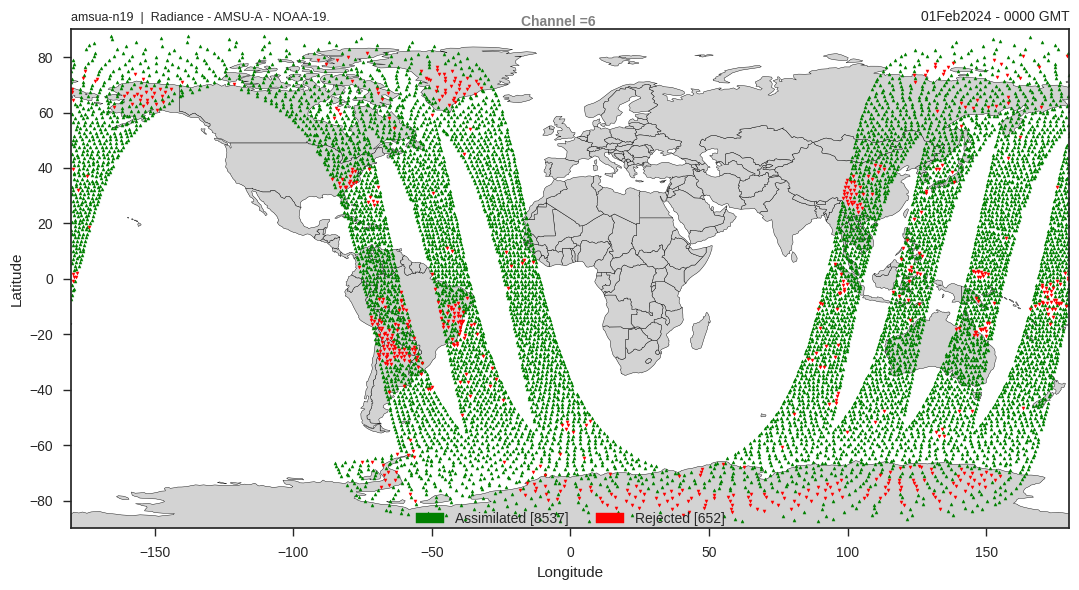

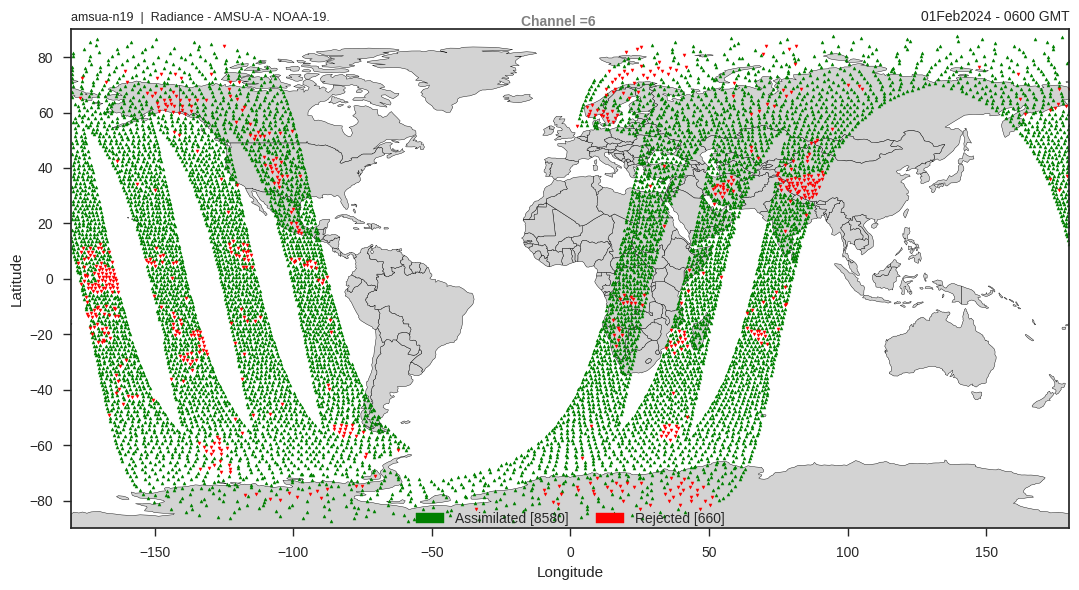

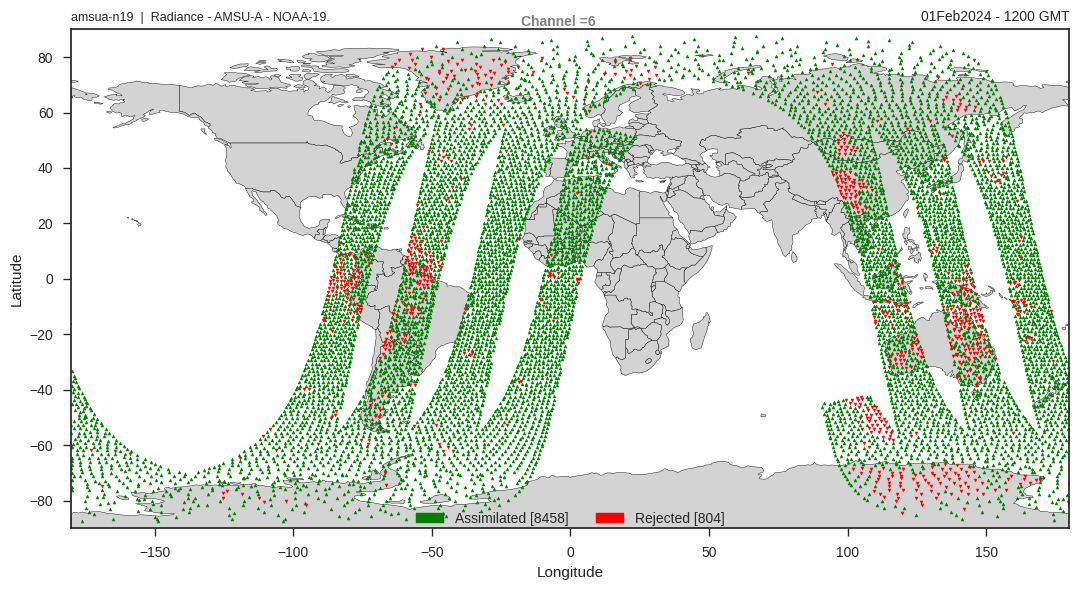

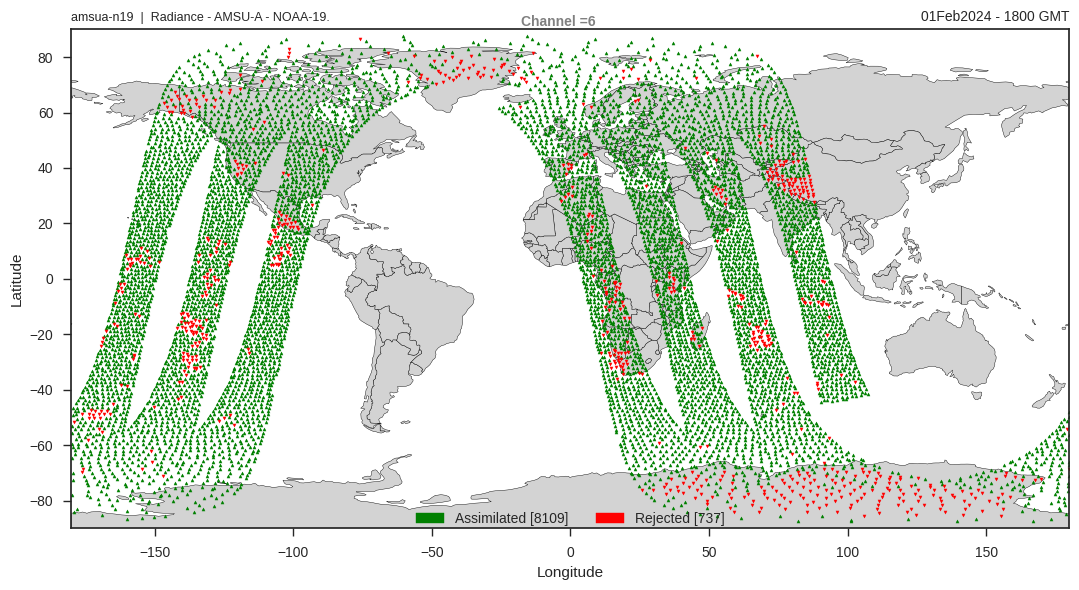

In [23]:
channel = 6
dateIni = '2024020100'
dateFin = '2024020118'

gd.plot_diag.statcount(gdf_list, 
                        varName=varName, 
                        varType=varType, 
                        noiqc=False, 
                        dateIni=dateIni, 
                        dateFin=dateFin, 
                        nHour=nHour, 
                        channel=channel, 
                        figTS=False, 
                        figMap=True, 
                        markersize=4.80)

Note that in the example above, the data from the selected channel were either assimilated or rejected. If the channel also contains any monitored data, a second figure would be generated showing the location of these monitored data. Below is an example of a channel from satellite `n19` with monitored data.

channel  8  not assimilated or rejected on the date --> 2024-02-01:00


/extra3/GitHub/readDiag.tagV1.3.0/gsidiag/__main__.py:93: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


channel  8  not assimilated or rejected on the date --> 2024-02-01:06


/extra3/GitHub/readDiag.tagV1.3.0/gsidiag/__main__.py:93: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


channel  8  not assimilated or rejected on the date --> 2024-02-01:12


/extra3/GitHub/readDiag.tagV1.3.0/gsidiag/__main__.py:93: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


channel  8  not assimilated or rejected on the date --> 2024-02-01:18


/extra3/GitHub/readDiag.tagV1.3.0/gsidiag/__main__.py:93: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


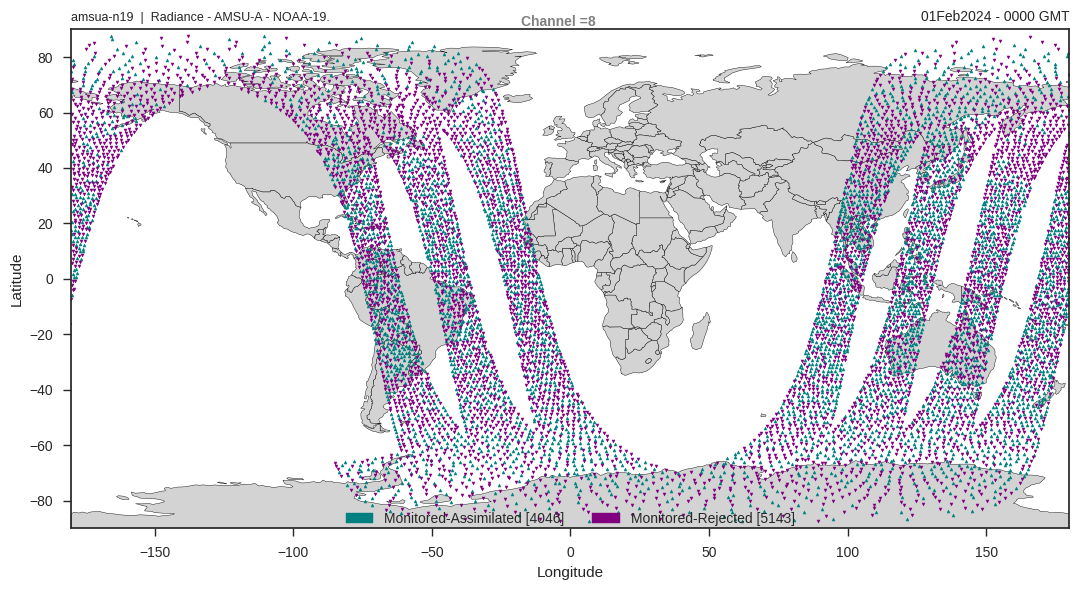

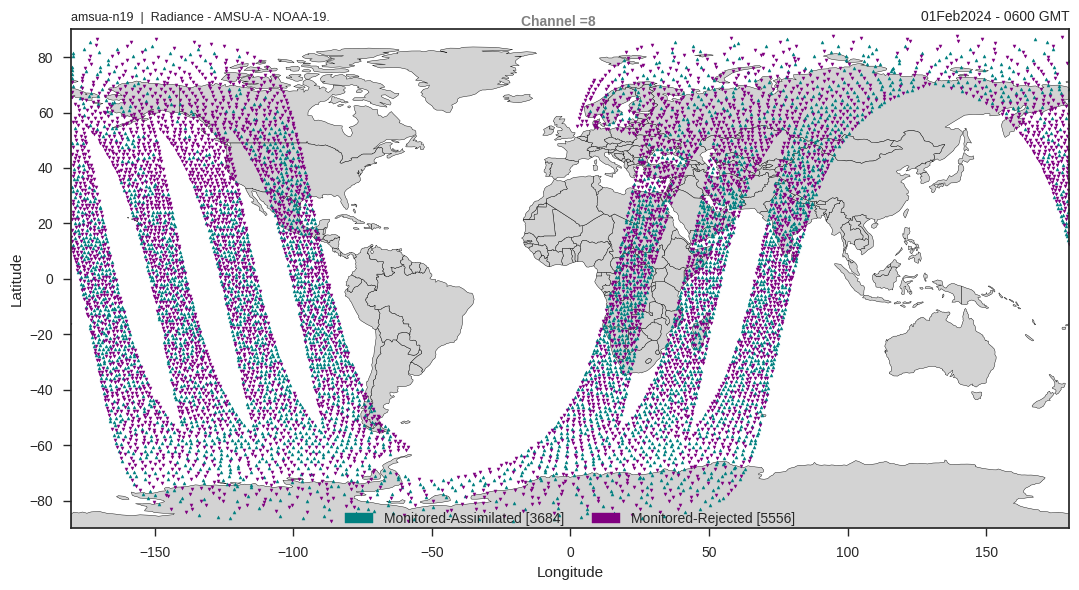

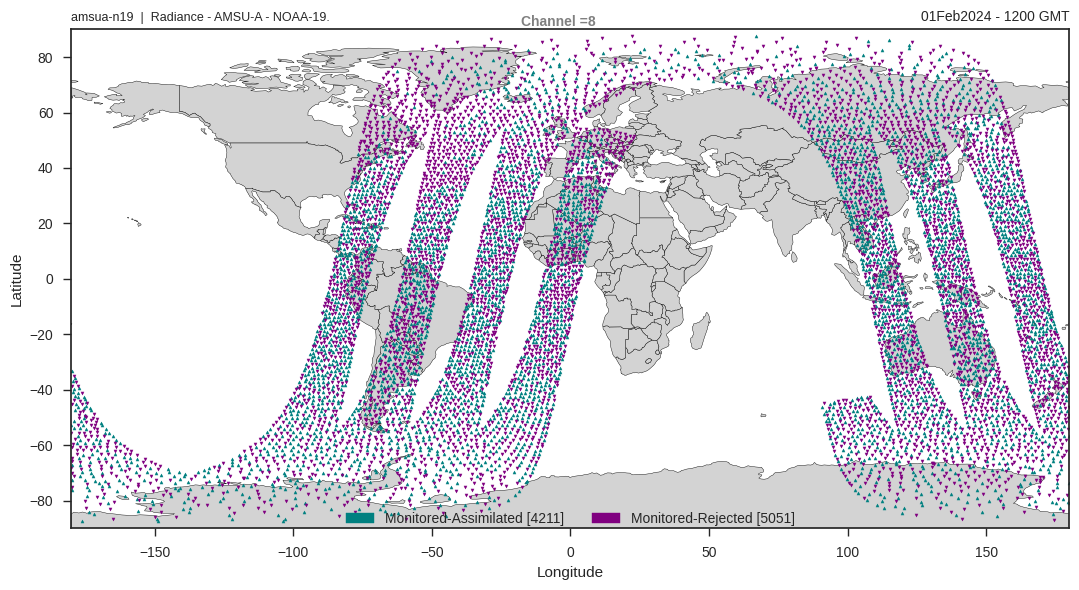

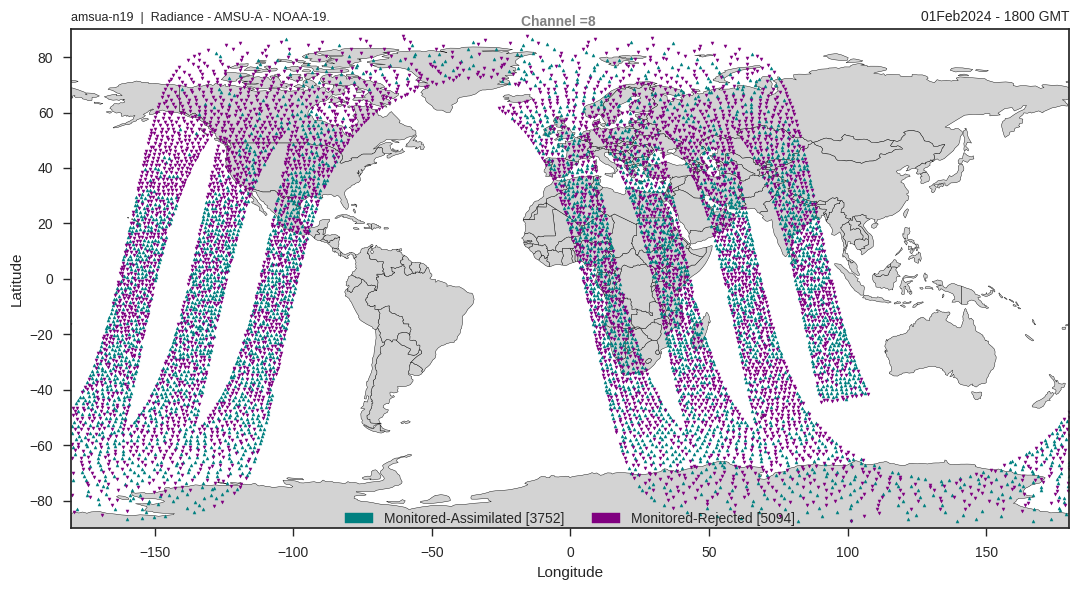

In [24]:
channel = 8
dateIni = '2024020100'
dateFin = '2024020118'

gd.plot_diag.statcount(gdf_list, 
                        varName=varName, 
                        varType=varType, 
                        noiqc=False, 
                        dateIni=dateIni, 
                        dateFin=dateFin, 
                        nHour=nHour, 
                        channel=channel, 
                        figTS=False, 
                        figMap=True, 
                        markersize=4.80)

When `figTS=True`, only a single figure showing the time series of the number of assimilated, rejected, and monitored data is returned.

<Figure size 600x400 with 0 Axes>

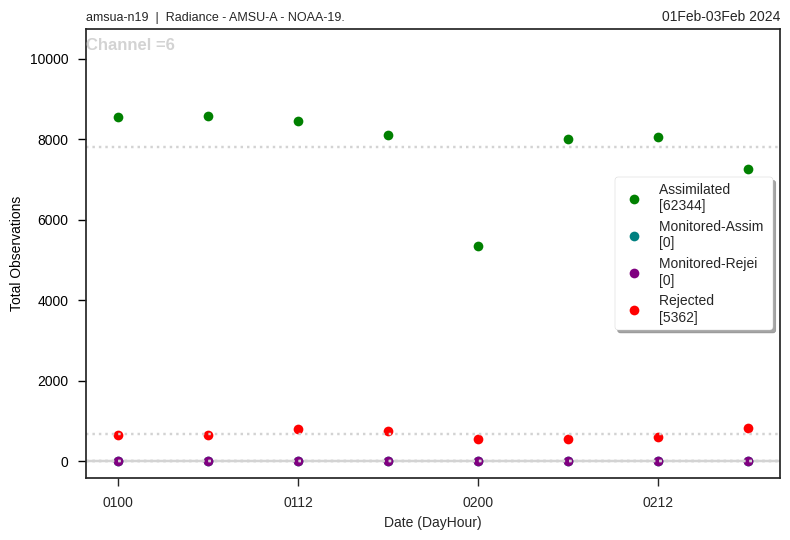

<Figure size 600x400 with 0 Axes>

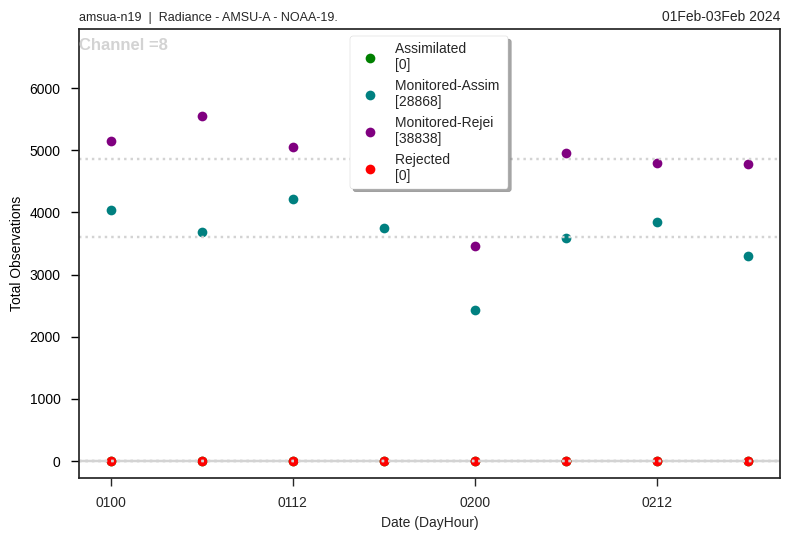

In [25]:
channel = 6
dateIni = '2024020100'
dateFin = '2024020218'

gd.plot_diag.statcount(gdf_list, 
                        varName=varName, 
                        varType=varType, 
                        noiqc=False, 
                        dateIni=dateIni, 
                        dateFin=dateFin, 
                        nHour=nHour, 
                        channel=channel, 
                        figTS=True, 
                        figMap=False, 
                        markersize=4.80)

channel = 8
gd.plot_diag.statcount(gdf_list, 
                        varName=varName, 
                        varType=varType, 
                        noiqc=False, 
                        dateIni=dateIni, 
                        dateFin=dateFin, 
                        nHour=nHour, 
                        channel=channel, 
                        figTS=True, 
                        figMap=False, 
                        markersize=4.80)

Once you have finished using the files, close them to free up the memory used:

In [26]:
for file in gdf_list:
    if file._FNumber != None:
            file.close()

The `readDiag` package is under development and constantly updated. New features will be added and demonstrated through this notebook.